# JupyterLab & R: Eurovison dataset

In the light of the currently ongoing Eurovision festival, we use a dataset containing all votes and scores given during the Eurovision festivals between 1975 and 2019. The dataset itself was downloaded from [Kaggle](https://www.kaggle.com/datasets/datagraver/eurovision-song-contest-scores-19752019?resource=download).

## Setting up your own R environment for JupyterLab

If you are regularly working with R, you will know that not all packages are readily available in a default installation of the R language.
This is exactly the same when using R on our clusters. There are different ways to implement this, but the recommended approach for JupyterLab
is by using kernels. Those kernels are in turn connected to conda environments, and these environments are created by the user themselves, meaning
that packages can be added as the user likes.

These kernels can be created in just three steps (from a terminal though):
1. create a conda environment with the correct packages, e.g.: `conda create -n r_env -c conda-forge r-base r-datatable r-ggplot2 jupyter_client r-irkernel`
2. Activate your environment:  `source activate r_env`
3. Create the kernel: `Rscript -e 'IRkernel::installspec(prefix="${VSC_HOME}/.local/", name="r_env", 	displayname="r_env")’`

***And that's it! You now have your R kernel available in JupyterLab:***

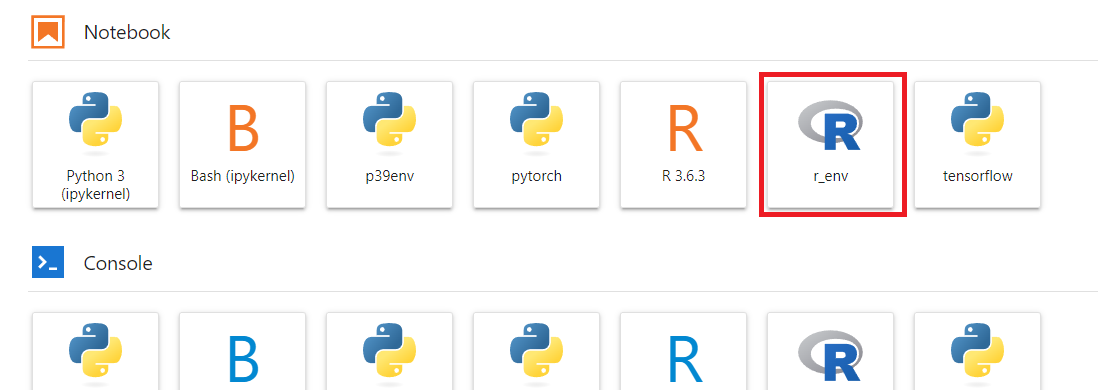

## The data

Now, let's take a quick look at the data by using some basic R functions. We have also included a library for data manipulation(`data.table`) and a plotting library `ggplot2`.

To make any packages available, you load them just like you would load them in any other R IDE:

In [26]:
library('data.table')
library("ggplot2")

In [36]:
eurovision_dt = fread('datasets/Eurovision.csv')

Let's have a look at the first rows of the dataframe:

In [38]:
head(eurovision_dt)

Year,(semi-)final,Edition,Jury_or_Televoting,From_country,To_country,Points,Duplicate
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1975,f,1975f,J,Belgium,Belgium,0,1
1975,f,1975f,J,Belgium,Finland,0,0
1975,f,1975f,J,Belgium,France,2,0
1975,f,1975f,J,Belgium,Germany,0,0
1975,f,1975f,J,Belgium,Ireland,12,0
1975,f,1975f,J,Belgium,Israel,1,0


The column names are not really well formatted, so let's first change them:

In [68]:
colnames(eurovision_dt) = c('year', 'phase', 'edition', 'voting_type', 'vote_from', 'vote_to', 'points', 'duplicate') 

We could for example have a look at how Belgium has performed over this period of 44 years. For this we will first clean the dataset a bit and split between finals and semi-finals. We will keep the voting type distinction.

In [77]:
eurovision_scores = eurovision_dt[, c('year', 'phase', 'voting_type', 'vote_to', 'points'), with=FALSE]
eurovision_scores = eurovision_scores[, lapply(.SD, sum), by = c('year', 'phase', 'voting_type', 'vote_to')]
ev_scores_be = eurovision_scores[vote_to == 'Belgium']
be_final_scores = ev_scores_be[phase == 'f']
be_semi_scores = ev_scores_be[phase == 'sf']

Now, let's plot this:

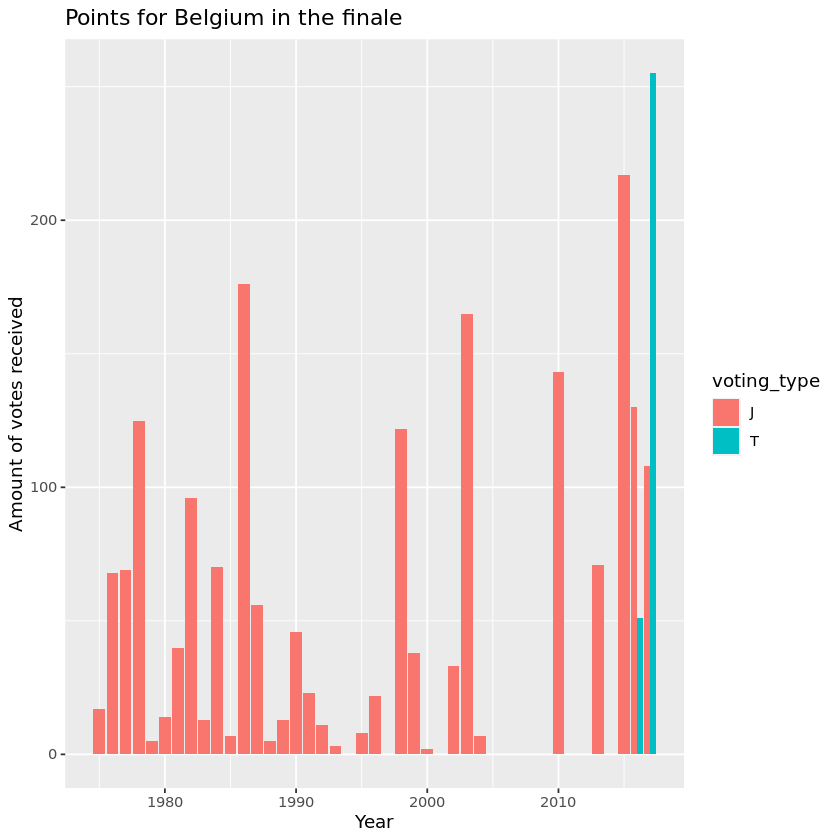

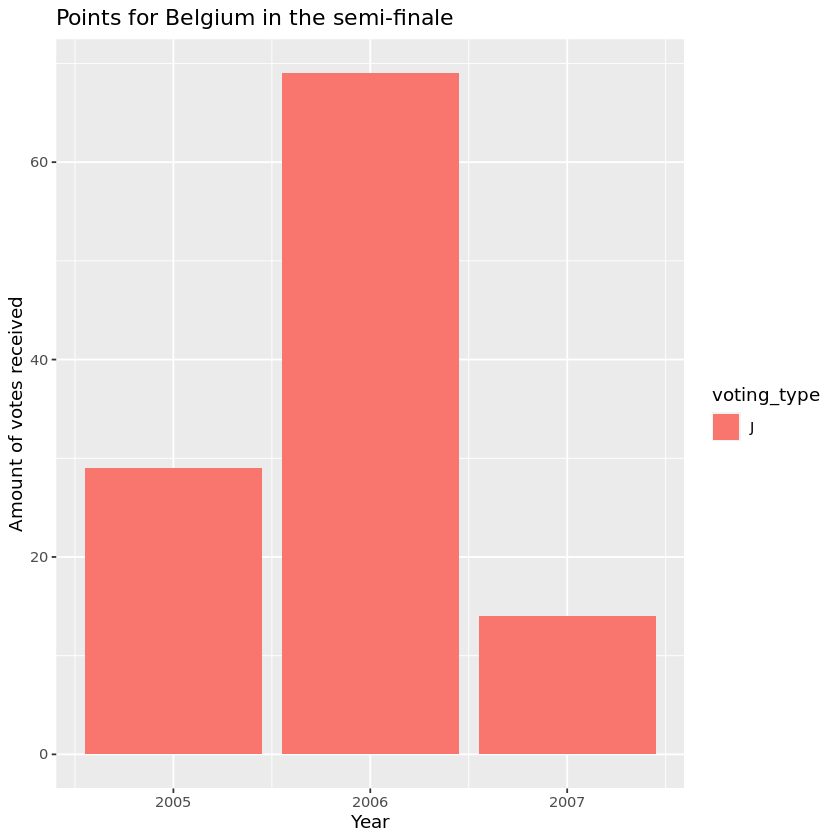

In [76]:
ggplot(data=be_final_scores, aes(fill=voting_type, y=points, x=year)) +
geom_bar(position="dodge", stat="identity")+
  ggtitle("Points for Belgium in the finale")+
  ylab("Amount of votes received")+
  xlab("Year")

ggplot(data=be_semi_scores, aes(fill=voting_type, y=points, x=year)) +
geom_bar(position="dodge", stat="identity")+
  ggtitle("Points for Belgium in the semi-finale")+
  ylab("Amount of votes received")+
  xlab("Year")